In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math 
from csv import reader 
from collections import Counter



In [11]:
def calcDistance(a,b):
    distance = 0
    for i in range(len(a)):
        distance += (a[i]-b[i])**2
    math.sqrt(distance)
    return distance

In [3]:
def testDataSet(trainingSet,testSet,kmin,kmax):
    testSize = testSet.shape[0];
    dims = testSet.shape[1] - 1
    bestRMSE = 0.0;
    bestK = 0.0
    for k in range(kmin,kmax):
        print(k)
        currRMSE = 0.0
        for i in range(0,testSize):
            neighbourDist = []
            for index,example in enumerate(trainingSet):
                distance = calcDistance(example[:-1],testSet[i,:-1])
                neighbourDist.append((distance,index))
            sortedNeighbourDist = sorted(neighbourDist)
            kNearest = sortedNeighbourDist[:k]
            nearestLabels = [trainingSet[j][1] for distance,j in kNearest]
            estimate = sum(nearestLabels) / len(nearestLabels)
            currRMSE += ((estimate - testSet[i,dims]) ** 2)
        currRMSE = currRMSE / testSize;
        currRMSE = math.sqrt(currRMSE)
        print('Current RMSE')
        print(currRMSE)
        if (currRMSE < bestRMSE) or (bestRMSE == 0.0):        
            bestRMSE = currRMSE
            bestK = k
    print('Best K value is:', bestK)
    print('With best RMSE of', bestRMSE)

In [4]:
def buildToyDataSet():
    ToyDat = np.random.uniform(low=0.1, high=1, size=(200,2))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(0,200):
        ToyDat[i,1] = ToyDat[i,0] * 2.5 + np.random.uniform(low=0.05,high=0.35,size=(1))
        plot1 = ax.scatter(ToyDat[i,0], ToyDat[i,1], alpha=0.8, c='red', edgecolors='none', s=30,marker="*")
    ToyTest = np.random.uniform(low=0.1, high=1, size=(10,2))
    for i in range(0,10):
        ToyTest[i,1] = ToyTest[i,0] * 2.5+ np.random.uniform(low=0.05,high=0.35,size=(1))
        plot2 = ax.scatter(ToyTest[i,0], ToyTest[i,1], alpha=0.8, c='blue', edgecolors='none', s=30,marker="+")
    plot1.set_label('Training data')
    plot2.set_label('Test data')
    ax.legend()
    plt.show()
    return ToyDat, ToyTest

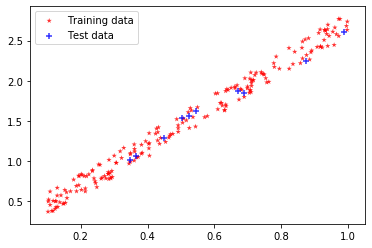

1
Current RMSE
0.08146164795149195
2
Current RMSE
0.07029297704233921
3
Current RMSE
0.0816301138891535
4
Current RMSE
0.07035047905958151
5
Current RMSE
0.07428580916421486
6
Current RMSE
0.07071280667528108
7
Current RMSE
0.06730235396092067
8
Current RMSE
0.06404199345287989
9
Current RMSE
0.06264465832764075
10
Current RMSE
0.0604741128878353
11
Current RMSE
0.06151789577151628
12
Current RMSE
0.06326279977991321
13
Current RMSE
0.07064107967025973
14
Current RMSE
0.0682546707554999
15
Current RMSE
0.075621311818799
16
Current RMSE
0.07667881331492347
17
Current RMSE
0.07675206535062055
18
Current RMSE
0.07602968642956084
19
Current RMSE
0.07405809090717774
Best K value is: 10
With best RMSE of 0.0604741128878353


In [5]:
trainingToy,testingToy  = buildToyDataSet();
testDataSet(trainingToy,testingToy,1,20)

In [12]:
filename = '/Desktop/CM50264/sarcos_inv.csv'
dataset = list()
with open(filename,'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row)
dataset = np.asarray(dataset, dtype=np.float32)
dims = dataset.shape[1]
testDataset = np.zeros([100,dims])
sampleDataset = np.zeros([20000,dims])
for i in range(1000,21000):
    sampleDataset[(i-1000),:] = dataset[(i-1000),:]
for i in range(0,100):
    testDataset[i,:] = dataset[i,:]
testDataSet(sampleDataset,testDataset,7,8)

7
Current RMSE
33.19317016968418
Best K value is: 7
With best RMSE of 33.19317016968418
